In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as apu
from pycraf import atm
from pycraf import conversions as cnv

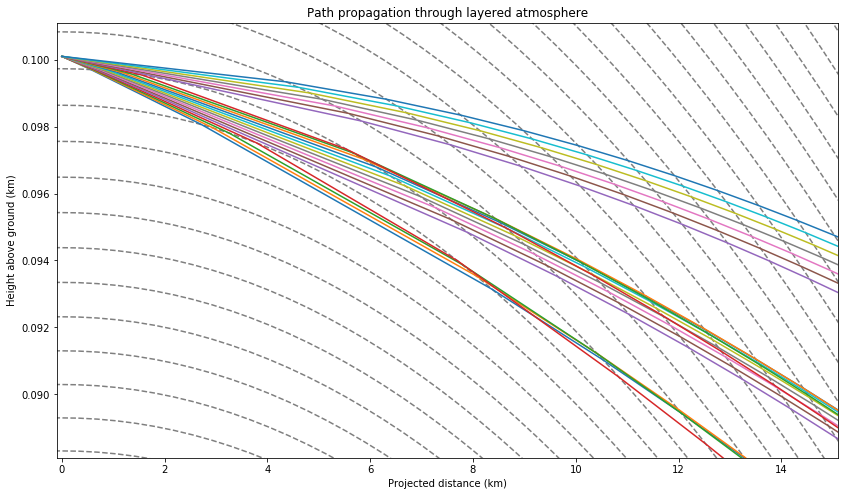

In [3]:
obs_alt = 100.1
earth_radius = 6371.
layer_angles = np.linspace(-0.001, 0.02, 361)

deltas = 0.0001 * np.exp(np.arange(900) / 100.)
heights = np.cumsum(np.hstack([0., deltas]))

plt.close()
fig = plt.figure(figsize=(14, 8))
for r in earth_radius + heights:
    plt.plot(r * np.sin(layer_angles), r * np.cos(layer_angles) - earth_radius, 'k--', alpha=0.5)

for elevation in np.linspace(-0.04, -0.01, 21):
# for elevation in [0.88]:
    path_params, _, _, _ = atm.atm._prepare_path(
        elevation, obs_alt, atm.profile_highlat_winter, 
        # max_arc_length=0.134,
        # max_path_length=15.,
        )
    plt.plot(path_params.x_n, path_params.y_n - earth_radius, '-')

plt.xlim((-0.1, 15.1))
plt.ylim(((obs_alt - 12) / 1000, (obs_alt + 1) / 1000))

plt.title('Path propagation through layered atmosphere')
plt.xlabel('Projected distance (km)')
plt.ylabel('Height above ground (km)')
# plt.savefig('/tmp/path_prop.jpg', dpi=300)
plt.show()


In [4]:
np.degrees(path_params.delta_n)[-1]

8.933501565830346

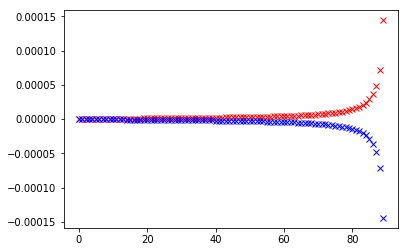

In [5]:
n1, n2 = 1.0003089446689986, 1.0003089007075814
alpha_n = np.arange(0, 90, 1)
beta_n = np.degrees(np.arcsin(n2 / n1 * np.sin(np.radians(alpha_n))))
plt.plot(alpha_n, alpha_n - beta_n, 'rx')
beta_n = np.degrees(np.arcsin(n1 / n2 * np.sin(np.radians(alpha_n))))
plt.plot(alpha_n, alpha_n - beta_n, 'bx')
plt.show()

In [6]:
obs_alt = 1000.  # m
elevations = np.arange(-2.35, 1.25, 0.0001)
h_ends, refractions = [], []
for elevation in elevations:
    ret = atm.atm._path_endpoint(
        elevation, obs_alt, atm.profile_highlat_winter,
        # max_path_length=30,
        max_arc_length=3,
        )
    (
        a_n, r_n, h_n, x_n, y_n, alpha_n, beta_n, delta_n, layer_idx,
        refraction,
        is_space_path,
        ) = ret    
    h_ends.append(h_n)
    refractions.append(refraction)


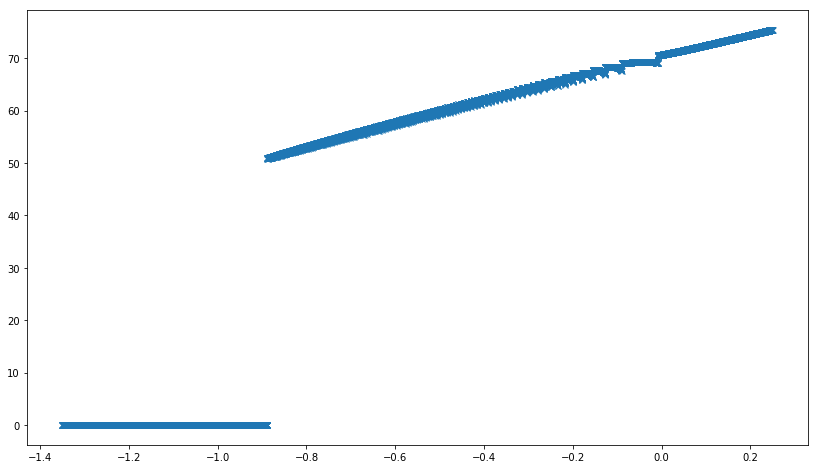

In [7]:
fig = plt.figure(figsize=(14, 8))
plt.plot(elevations, h_ends, 'x')
plt.show()

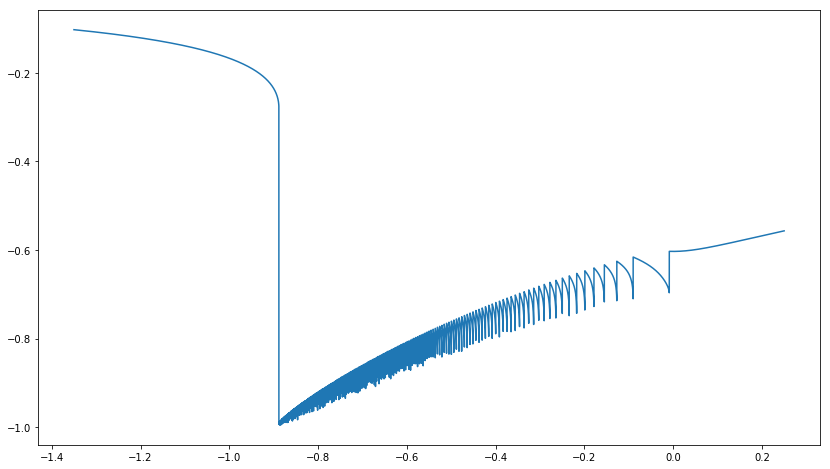

In [8]:
fig = plt.figure(figsize=(14, 8))
plt.plot(elevations, refractions, '-')
plt.show()

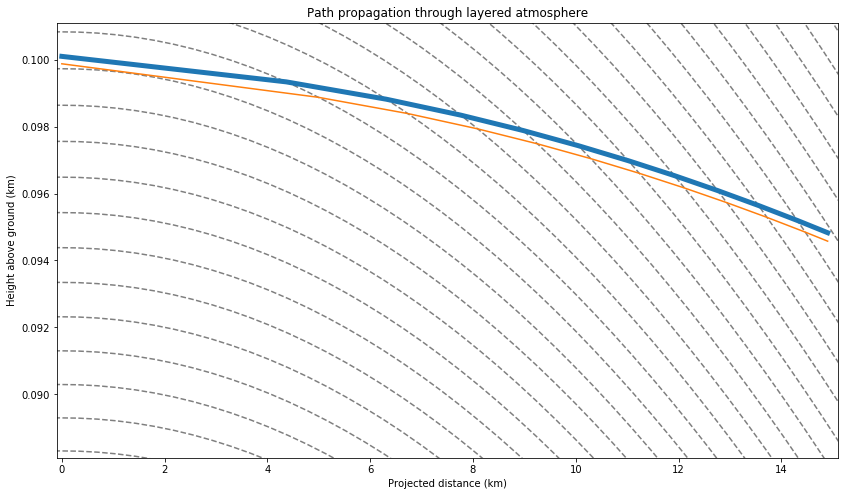

In [26]:
obs_alt = 100.1
target_alt = 112.
earth_radius = 6371.
layer_angles = np.linspace(-0.001, 0.02, 361)

deltas = 0.0001 * np.exp(np.arange(900) / 100.)
heights = np.cumsum(np.hstack([0., deltas]))

plt.close()
fig = plt.figure(figsize=(14, 8))
for r in earth_radius + heights:
    plt.plot(r * np.sin(layer_angles), r * np.cos(layer_angles) - earth_radius, 'k--', alpha=0.5)

# for elevation in np.linspace(-0.04, -0.01, 21):
for elevation in [-0.01]:
    path_params, _, _, _ = atm.atm._prepare_path(
        elevation, obs_alt, atm.profile_highlat_winter, 
        max_arc_length=0.134,
        # max_path_length=15.,
        )
    plt.plot(path_params.x_n, path_params.y_n - earth_radius, '-', lw=5)

    # backpropagation
    elevation_r = 90 - (180. - np.degrees(path_params.alpha_n[-1]))
    target_alt_r = path_params.h_n[-1] * 1000
    path_params_r, _, _, _ = atm.atm._prepare_path(
        elevation_r, target_alt, atm.profile_highlat_winter, 
        max_arc_length=0.134,
        # max_path_length=15.,
        )
    x_n_r, y_n_r = path_params_r.x_n, path_params_r.y_n
    delta_n_r = path_params_r.delta_n
    ddelta_n = -delta_n_r + delta_n_r[-1] - delta_n_r
    x_n_r, y_n_r = (
        np.cos(ddelta_n) * x_n_r + np.sin(ddelta_n) * y_n_r,
        -np.sin(ddelta_n) * x_n_r + np.cos(ddelta_n) * y_n_r,
        )
    plt.plot(x_n_r, y_n_r - earth_radius, '-')
    
plt.xlim((-0.1, 15.1))
plt.ylim(((obs_alt - 12) / 1000, (obs_alt + 1) / 1000))

plt.title('Path propagation through layered atmosphere')
plt.xlabel('Projected distance (km)')
plt.ylabel('Height above ground (km)')
# plt.savefig('/tmp/path_prop.jpg', dpi=300)
plt.show()


In [20]:
obs_alt_r

112.25309902147274

In [18]:
path_params.alpha_n, path_params.h_n

(array([       nan, 1.57028564, 1.57007177, 1.56990648, 1.5697661 ,
        1.5696415 , 1.56952801, 1.56942285, 1.56932424, 1.56923093,
        1.56914201, 1.56907785]),
 array([0.1001    , 0.10083376, 0.10194715, 0.10307174, 0.10420763,
        0.10535493, 0.10651377, 0.10768425, 0.10886649, 0.11006062,
        0.11126675, 0.1122531 ]))

In [17]:
elevation = 90 - (180. - np.degrees(path_params.alpha_n[-1]))
elevation, np.degrees(path_params.alpha_n[-1])

(-0.09846130411710874, 89.90153869588289)

In [ ]:
elevation = 9  # deg
obs_alt = 1000  # m
path_params, refraction, _, _ = atm.atm._prepare_path(
    elevation, obs_alt, atm.profile_highlat_winter, max_path_length=50.
    )
ret = atm.atm._path_endpoint(
    elevation, obs_alt, atm.profile_highlat_winter, max_path_length=50.
    )

path_params, refraction, is_space_path, weather = atm.atm._prepare_path(
    elevation, obs_alt, atm.profile_highlat_winter, max_path_length=5.
    )


In [ ]:
%timeit _ = atm.atm._prepare_path(90, 10, atm.profile_highlat_winter, max_path_length=50.)
# 235 µs ± 2.42 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
%timeit _ = atm.atm._prepare_path(-90, 50100, atm.profile_highlat_winter, max_path_length=50.)
# 217 µs ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
%timeit _ = atm.atm._prepare_path(1, 100, atm.profile_highlat_winter, max_path_length=50.)
# 246 µs ± 5.18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
%timeit _ = atm.atm._prepare_path(-2, 3000, atm.profile_highlat_winter, max_path_length=50.)
# 182 µs ± 2.28 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)

%timeit _ = atm.atm._path_endpoint(-2, 3000, atm.profile_highlat_winter, max_path_length=50.)
# 40.7 µs ± 1.36 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
